In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [ ]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
geography=pd.get_dummies(x["Geography"],drop_first=True)
gender=pd.get_dummies(x["Gender"],drop_first=True)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [ ]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [ ]:
x=pd.concat([x,geography,gender],axis=1)
x=x.drop(["Geography","Gender"],axis=1)

In [ ]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train_full,x_test,y_train_full,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(x_train_full,y_train_full,train_size=0.8,random_state=42)

## checking missing values

In [ ]:
x_train.isnull().sum()


CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Germany            0
Spain              0
Male               0
dtype: int64

## Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_valid=scaler.transform(x_valid)
x_test=scaler.transform(x_test)

In [ ]:
!pip install keras-tuner

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
model=Sequential()
model.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu',input_dim=11))
model.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(x_train,y_train,epochs=100,validation_data=(x_valid,y_valid))

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5775 - accuracy: 0.7328 - val_loss: 0.5032 - val_accuracy: 0.7906
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4854 - accuracy: 0.7978 - val_loss: 0.4612 - val_accuracy: 0.7944
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4577 - accuracy: 0.8081 - val_loss: 0.4417 - val_accuracy: 0.8037
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4455 - accuracy: 0.8145 - val_loss: 0.4330 - val_accuracy: 0.8138
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4384 - accuracy: 0.8142 - val_loss: 0.4269 - val_accuracy: 0.8144
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.8173 - val_loss: 0.4239 - val_accuracy: 0.8156
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4300 - accuracy: 0.8186 - val_loss: 0.4208 - val_accuracy: 0.8244

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.577503,0.732813,0.503184,0.790625
1,0.485368,0.797813,0.461177,0.794375
2,0.457686,0.808125,0.441684,0.803750
3,0.445450,0.814531,0.433020,0.813750
4,0.438405,0.814219,0.426930,0.814375
...,...,...,...,...
95,0.323356,0.866562,0.335496,0.855625
96,0.322833,0.867188,0.337036,0.856875
97,0.323273,0.866719,0.336229,0.856250
98,0.323168,0.866094,0.336447,0.856875


In [ ]:
!pip install keras-tuner

In [ ]:
def build_model(hp):
  model=Sequential()
  for i in range(hp.Int('num_layers',2,20)):
    model.add(Dense(units=hp.Int('units_'+str(i),min_value=32,max_value=512,step=32),
                    kernel_initializer='he_uniform',
                    activation='relu'))
  model.add(Dense(units=1,kernel_initializer="glorot_uniform",activation='sigmoid'))
  model.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',[1e-2,1e-3,1e-4])),
                metrics=["accuracy"])
  return model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project1',
    project_name='Churn')

INFO:tensorflow:Reloading Oracle from existing project project1/Churn/oracle.json
INFO:tensorflow:Reloading Tuner from project1/Churn/tuner0.json


In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 18
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [ ]:
tuner.search(x_train, y_train,
             epochs=100,
             validation_data=(x_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.get_best_hyperparameters()

In [ ]:
tuner.get_best_models()

In [ ]:
tuner.results_summary()

Results summary
Results in project1/Churn
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 5
units_0: 480
units_1: 416
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
Score: 0.8585000038146973
Trial summary
Hyperparameters:
num_layers: 5
units_0: 352
units_1: 352
learning_rate: 0.001
units_2: 192
units_3: 256
units_4: 224
units_5: 352
units_6: 160
units_7: 512
units_8: 416
units_9: 128
units_10: 32
units_11: 512
Score: 0.8581666549046835
Trial summary
Hyperparameters:
num_layers: 16
units_0: 224
units_1: 416
learning_rate: 0.001
units_2: 384
units_3: 96
units_4: 480
units_5: 256
units_6: 416
units_7: 320
units_8: 512
units_9: 256
units_10: 224
units_11: 480
units_12: 32
units_13: 32
units_14: 32
units_15: 32
Score: 0.85616668065389
Trial summary
Hyperparameters:
num_layers: 8
units_0: 192
units_1: 512
learning_rate: 0.0001
units_2: 32
units_3: 256
units_4: 64
units_5: 128
units_6: 288
units_7: 192
units_8: 128
u

#### Hence, we get to know that best result is given by 5 hidden layers,with obtained vals of nuerons

In [ ]:
num_layers: 5
units_0: 480
units_1: 416
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32

In [ ]:
model=Sequential()
model.add(Dense(units=480,kernel_initializer='he_uniform',activation='relu',input_dim=11))
model.add(Dense(units=416,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=0.0001),metrics=["accuracy"])
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 480)               5760      
_________________________________________________________________
dense_25 (Dense)             (None, 416)               200096    
_________________________________________________________________
dense_26 (Dense)             (None, 32)                13344     
_________________________________________________________________
dense_27 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_28 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 33        
Total params: 221,345
Trainable params: 221,345
Non-trainable params: 0
________________________________________________

In [ ]:
history=model.fit(x_train,y_train,epochs=60,validation_data=(x_valid,y_valid),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/60
200/200 [==============================] - 1s 3ms/step - loss: 0.4452 - accuracy: 0.8116 - val_loss: 0.3726 - val_accuracy: 0.8450
Epoch 2/60
200/200 [==============================] - 1s 3ms/step - loss: 0.3661 - accuracy: 0.8489 - val_loss: 0.3479 - val_accuracy: 0.8569
Epoch 3/60
200/200 [==============================] - 1s 3ms/step - loss: 0.3419 - accuracy: 0.8620 - val_loss: 0.3442 - val_accuracy: 0.8562
Epoch 4/60
200/200 [==============================] - 1s 3ms/step - loss: 0.3296 - accuracy: 0.8623 - val_loss: 0.3375 - val_accuracy: 0.8569
Epoch 5/60
200/200 [==============================] - 1s 3ms/step - loss: 0.3188 - accuracy: 0.8627 - val_loss: 0.3406 - val_accuracy: 0.8581
Epoch 6/60
200/200 [==============================] - 1s 3ms/step - loss: 0.3082 - accuracy: 0.8714 - val_loss: 0.3370 - val_accuracy: 0.8550
Epoch 7/60
200/200 [==============================] - 1s 3ms/step - loss: 0.3017 - accuracy: 0.8730 - val_loss: 0.3413 - val_accuracy: 0.8600
Epoch 

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.445232,0.811562,0.372555,0.845000
1,0.366056,0.848906,0.347906,0.856875
2,0.341882,0.862031,0.344188,0.856250
3,0.329625,0.862344,0.337540,0.856875
4,0.318849,0.862656,0.340587,0.858125
5,0.308229,0.871406,0.337042,0.855000
6,0.301686,0.872969,0.341265,0.860000
7,0.294625,0.876094,0.340530,0.852500
8,0.287412,0.878438,0.339676,0.856250
9,0.281809,0.881875,0.346361,0.858125


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


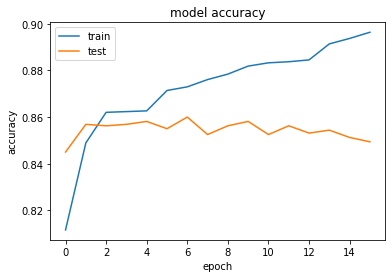

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

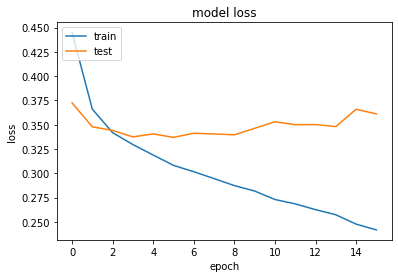

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3530 - accuracy: 0.8530


[0.3530193269252777, 0.8529999852180481]

In [ ]:
y_pred=model.predict(x_test)
y_pred=(y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
cm

array([[1522,  209],
       [  85,  184]])

In [ ]:
from sklearn.metrics import accuracy_score
sc=accuracy_score(y_pred,y_test)
sc

0.853